# Generate protein-coding count file

In [1]:
# Generate protein-coding count file
import pandas as pd

df =pd.read_csv("../data/GeneExpressionData/featurecounts.genes.counts.selected_reps.txt", sep='\t')
protein_df = pd.read_csv("../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.protein_coding.txt", sep='\t')

protein_counts = df[df["gene"].isin(protein_df["gene"])]

protein_counts.to_csv("../data/GeneExpressionData/featurecounts.genes.counts.selected_reps.pr.txt", index=False, sep="\t")

# Check TPM, Counts, and surrogate variables

In [20]:
counts = pd.read_csv("../data/GeneExpressionData/featurecounts.genes.counts.selected_reps.protein_coding.txt", sep="\t")
tpm_ln = pd.read_csv("../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.protein_coding.txt", sep="\t")
counts_ln = pd.read_csv("../data/GeneExpressionData/featurecounts.genes.counts.selected_reps.ln.surrogate_variables_corrected.protein_coding.txt", sep="\t")

print "Counts"
print counts.head()
print "TPM ln"
print tpm_ln.head()
print "Counts ln"
print counts_ln.head()
print "Counts e^ ln"
print np.exp(counts_ln["t00_rep1"])
print "Counts 2^ ln"
print np.exp2(counts_ln["t00_rep1"])

Counts
                 gene  t00_rep1  t00_rep2plusextra  t00_rep3plusextra  \
0   ENSG00000279928.1         3                  7                  2   
1   ENSG00000279457.2        25                 28                 35   
2   ENSG00000187634.9       691               1299                990   
3   ENSG00000188976.9      1417               2274               2149   
4  ENSG00000187961.12       222                393                367   

   t00_rep4  t05_rep1  t05_rep2  t05_rep3  t05_rep4  t1_rep1    ...     \
0         4         3         3         5         1        3    ...      
1        28        16        24        24         6       11    ...      
2      1226       726       696       968       529      194    ...      
3      2856      1290      1127      2123      1342      938    ...      
4       381       131       196       303       163      126    ...      

   t8_rep3  t8_rep4  t10_rep1  t10_rep2  t10_rep3  t10_rep4  t12_rep1  \
0        2        3         1       

# edgeR: Visualize the differentially expressed, and not, genes

In [15]:
import pandas as pd
import geneTSmunging as gtm

data = gtm.load_file_and_avg("../data/GeneExpressionData/edgeR-group-processing/featurecounts.genes.counts.selected_reps.protein_coding.txt")
TPM_filename = "../data/GeneExpressionData/featurecounts.genes.counts.selected_reps.ln.surrogate_variables_corrected.protein_coding.txt"
tpm_data = pd.read_csv(TPM_filename, sep="\t")

result_filename = "../data/GeneExpressionData/edgeR-group-processing/featurecounts.genes.counts.selected_reps.protein_coding_edgeR-results.txt"
result = pd.read_csv(result_filename, sep="\t")


new_columns = result.columns.values

new_columns[0] = "gene";

result.columns = new_columns

print result.head()

least_diff_exp_genes = result["gene"][-4:-1]
most_diff_exp_genes = result["gene"][0:3]

almost_diff_exp_genes = result[np.logical_and(result["FDR"] < 0.07, result["FDR"] > 0.03)]["gene"][0:3]


Avg + STD loaded
Fold change loaded
Diff loaded
normalized diff loaded
                 gene     logFC    logCPM          F        PValue       FDR
0  ENSG00000067082.13  0.898744  7.996356  37.289853  2.875815e-07  0.004932
1  ENSG00000204531.14  1.585853  1.794108  33.009939  9.463491e-07  0.008114
2   ENSG00000128016.5  1.550737  5.975505  28.969080  3.119530e-06  0.017832
3   ENSG00000116741.7  1.120170  5.776279  25.699217  8.650639e-06  0.037087
4  ENSG00000179094.12  0.992423  5.737774  24.176176  1.417012e-05  0.048601


COUNT DATA


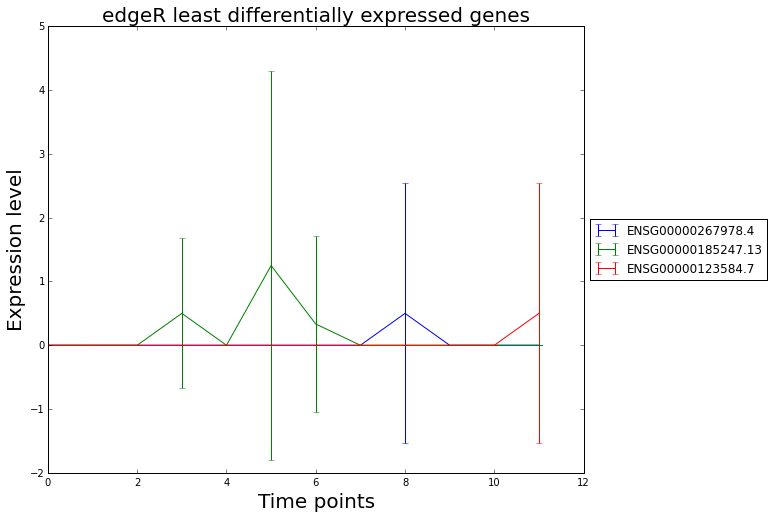

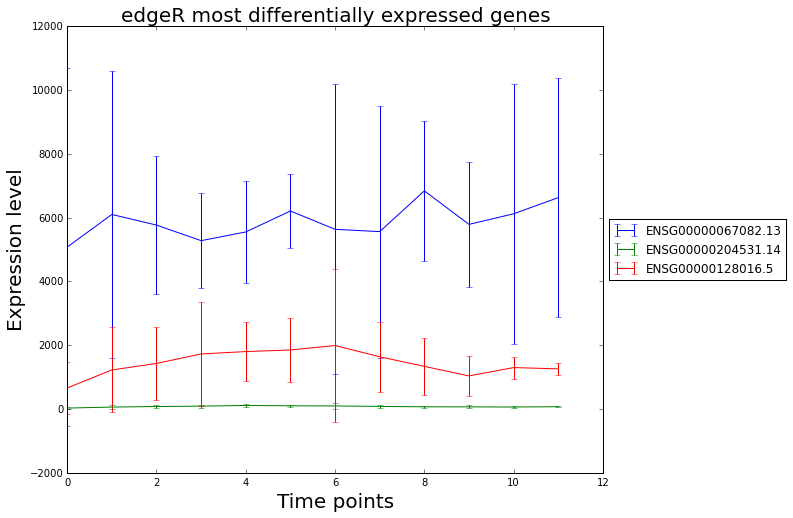

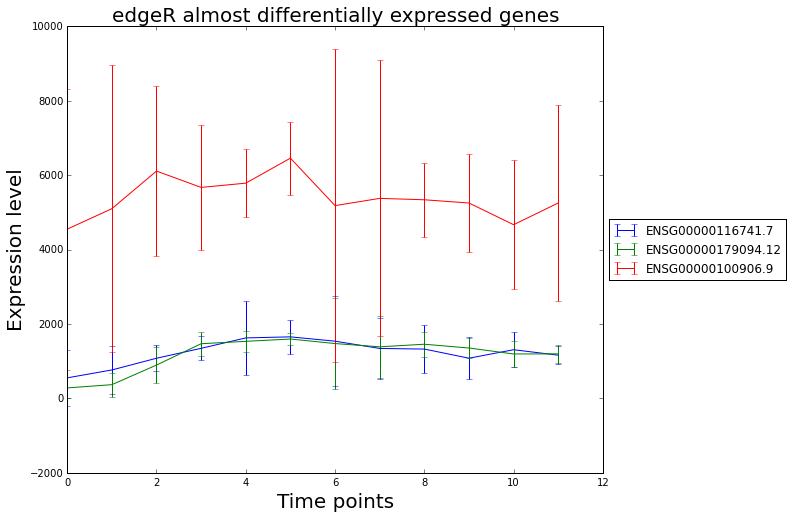


TPM DATA


KeyError: "['t00' 't05' 't1_' 't2_' 't3_' 't4_' 't5_' 't6_' 't7_' 't8_' 't10_' 't12_'] not in index"

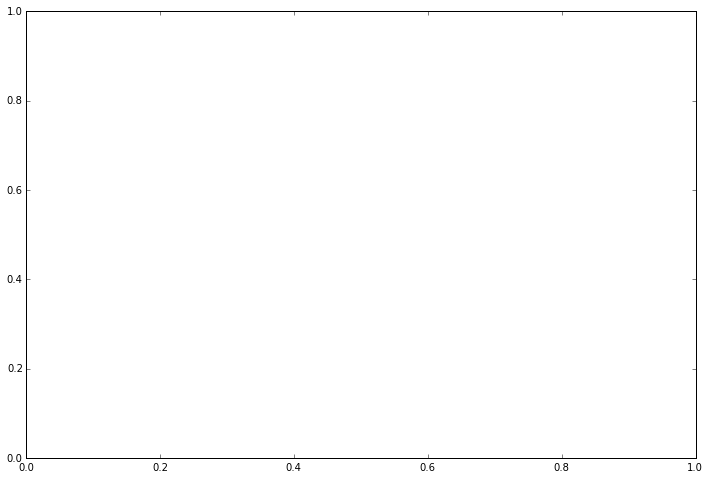

In [16]:
%matplotlib inline
reload(gtm)

print "COUNT DATA"
gtm.plot_genes(data, least_diff_exp_genes, title="edgeR least differentially expressed genes, counts", ylabel="Counts")
gtm.plot_genes(data, most_diff_exp_genes, title="edgeR most differentially expressed genes, counts", ylabel="Counts")
gtm.plot_genes(data, almost_diff_exp_genes, title="edgeR almost differentially expressed genes, counts", ylabel="Counts")

print
print "TPM DATA"
gtm.plot_genes(tpm_data, least_diff_exp_genes, title="edgeR least differentially expressed genes, TPM")
gtm.plot_genes(tpm_data, most_diff_exp_genes, title="edgeR most differentially expressed genes")
gtm.plot_genes(tpm_data, almost_diff_exp_genes, title="edgeR almost differentially expressed genes")


# edgeR: Save the differentially expressed genes

In [27]:
FDR = 0.05
diff_exp_genes = result[result["FDR"] < FDR]["gene"]

print "Number of diff_exp_genes: ", len(diff_exp_genes)

rep_keys = ['t00_rep1', 't00_rep2plusextra', 't00_rep3plusextra', 't00_rep4', 't05_rep1', 't05_rep2', 't05_rep3', 't05_rep4', 't1_rep1', 't1_rep2', 't1_rep3', 't1_rep4', 't2_rep1', 't2_rep2', 't2_rep3', 't2_rep4', 't3_rep1', 't3_rep2', 't3_rep3', 't3_rep4', 't4_rep1', 't4_rep2', 't4_rep3', 't4_rep4', 't5_rep2', 't5_rep3', 't5_rep4', 't6_rep2', 't6_rep3', 't6_rep4', 't7_rep1', 't7_rep2', 't7_rep3', 't7_rep4', 't8_rep1', 't8_rep2', 't8_rep3', 't8_rep4', 't10_rep1', 't10_rep2', 't10_rep3', 't10_rep4', 't12_rep1', 't12_rep2', 't12_rep3', 't12_rep4']


de_data = data[data["gene"].isin(diff_exp_genes)][["gene"] + rep_keys]

de_filename = "../data/GeneExpressionData/edgeR-group-processing/featurecounts.genes.counts.selected_reps.protein_coding.edgeR-" + str(FDR) + ".txt"
de_data.to_csv(de_filename, sep="\t", index=False)

print "Diff-exp genes written to ", de_filename

Number of diff_exp_genes:  5
Diff-exp genes written to  ../data/GeneExpressionData/edgeR-group-processing/featurecounts.genes.counts.selected_reps.protein_coding.edgeR-0.05.txt


# DESeq: Visualize the differentially expressed, and not, genes

In [28]:
import pandas as pd
import geneTSmunging as gtm

data = gtm.load_file_and_avg("../data/GeneExpressionData/edgeR-group-processing/featurecounts.genes.counts.selected_reps.protein_coding.txt")
result_filename = "../data/GeneExpressionData/edgeR-group-processing/featurecounts.genes.counts.selected_reps.protein_coding_DESeq-results.txt"

result = pd.read_csv(result_filename, sep="\t")

new_columns = result.columns.values

new_columns[0] = "gene";

result.columns = new_columns

print result.head()

least_diff_exp_genes = result["gene"][-4:-1]
most_diff_exp_genes = result["gene"][0:3]

Avg + STD loaded
Fold change loaded
Diff loaded
normalized diff loaded
                 gene     baseMean  log2FoldChange     lfcSE       stat  \
0  ENSG00000179094.12  1224.307874        2.519028  0.165397  15.230156   
1  ENSG00000160712.11   588.156378        1.933661  0.145816  13.260957   
2   ENSG00000119138.4   729.658691        1.958288  0.179626  10.902011   
3   ENSG00000168497.4  2871.791402        1.681535  0.166153  10.120405   
4  ENSG00000116285.11  8805.017983        1.343103  0.134248  10.004629   

         pvalue          padj  
0  2.230592e-52  3.157627e-48  
1  3.898885e-40  2.759631e-36  
2  1.127381e-27  5.319733e-24  
3  4.485563e-24  1.587441e-20  
4  1.454352e-23  4.117560e-20  


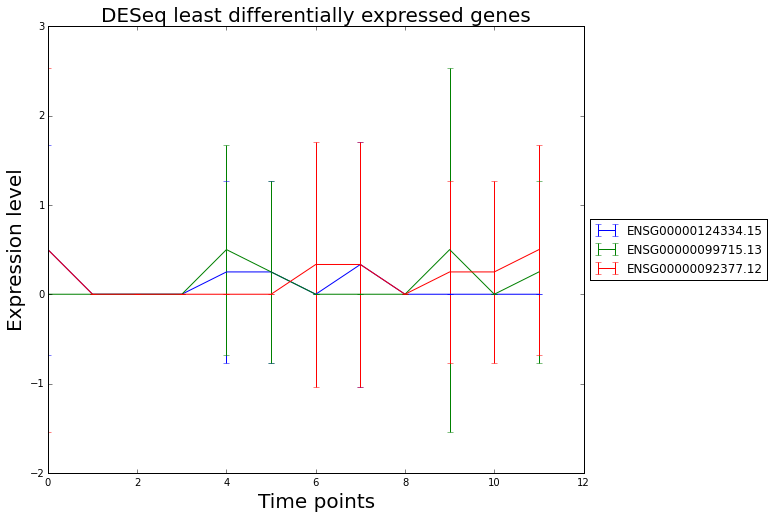

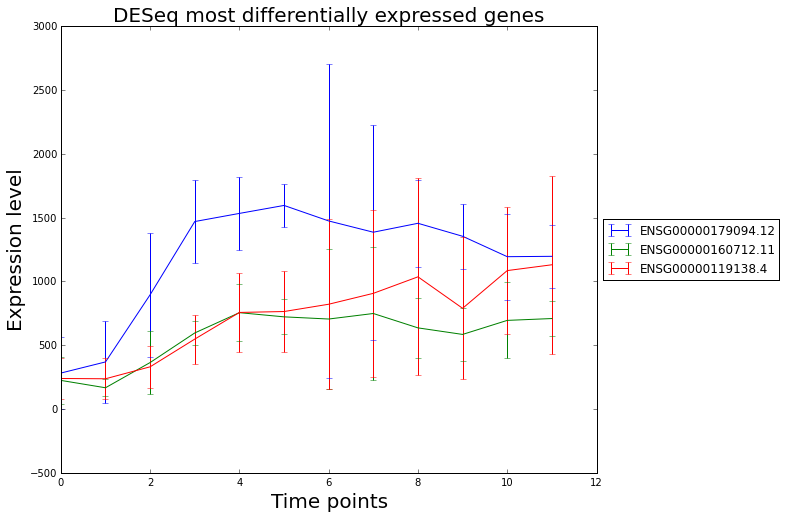

In [29]:
%matplotlib inline

gtm.plot_genes(data, least_diff_exp_genes, title="DESeq least differentially expressed genes")
gtm.plot_genes(data, most_diff_exp_genes, title="DESeq most differentially expressed genes")

# DESeq: Save the differentially expressed genes

In [30]:
data

,gene,t00_rep1,t00_rep2plusextra,t00_rep3plusextra,t00_rep4,t05_rep1,t05_rep2,t05_rep3,t05_rep4,t1_rep1,...,t05-t1_ normal_diff,t1_-t2_ normal_diff,t2_-t3_ normal_diff,t3_-t4_ normal_diff,t4_-t5_ normal_diff,t5_-t6_ normal_diff,t6_-t7_ normal_diff,t7_-t8_ normal_diff,t8_-t10_ normal_diff,t10_-t12_ normal_diff
0,ENSG00000279928.1,3,7,2,4,3,3,5,1,3,...,1.162313,-0.435867,-1.394775,0.842677,-0.009686,1.908130,-0.968594,-0.116231,0.203405,-0.116231
1,ENSG00000279457.2,25,28,35,28,16,24,24,6,11,...,-0.878056,0.577352,0.268629,-0.392920,0.312732,0.959580,0.459743,0.136319,-1.142675,1.591727
2,ENSG00000187634.9,691,1299,990,1226,726,696,968,529,194,...,-2.146522,0.633314,0.088909,0.220594,0.408486,0.594772,0.989826,0.477540,-0.082924,0.525718
3,ENSG00000188976.9,1417,2274,2149,2856,1290,1127,2123,1342,938,...,-1.228368,1.030397,0.341184,0.176120,-0.148858,0.322522,1.063216,0.219558,0.305468,0.322844
4,ENSG00000187961.12,222,393,367,381,131,196,303,163,126,...,-1.111672,0.438610,0.201963,0.549689,0.126300,0.567398,1.003666,0.477246,-0.565934,0.723553
5,ENSG00000187583.9,68,88,101,102,54,49,99,58,40,...,-1.021585,0.317416,-0.716496,1.130986,-0.942488,0.865446,1.097087,0.741150,-0.902940,0.876745
6,ENSG00000187642.8,2,2,6,0,2,2,2,4,0,...,-1.595848,1.695589,-1.230133,0.049870,0.964158,0.537491,-0.803465,-0.498703,-0.132987,0.964158
7,ENSG00000188290.9,84,152,187,153,83,102,173,89,35,...,-2.397652,-0.141873,0.794488,0.127686,0.889070,0.430348,0.510742,0.269559,0.567492,0.312120
8,ENSG00000187608.7,129,164,106,204,105,84,145,124,97,...,-1.782715,0.183734,0.388572,0.388572,0.302085,-0.298774,0.943912,0.907496,-0.403470,1.139646
9,ENSG00000188157.12,3871,6325,6427,7989,3863,3464,6128,3665,2424,...,-1.297969,1.563519,-0.119386,-0.009005,-0.130068,0.424642,1.058335,0.163203,0.378785,0.057353


In [31]:
FDR = 0.05
diff_exp_genes = result[result["padj"] < FDR]["gene"]

print "Number of diff_exp_genes: ", len(diff_exp_genes)

rep_keys = ['t00_rep1', 't00_rep2plusextra', 't00_rep3plusextra', 't00_rep4', 't05_rep1', 't05_rep2', 't05_rep3', 't05_rep4', 't1_rep1', 't1_rep2', 't1_rep3', 't1_rep4', 't2_rep1', 't2_rep2', 't2_rep3', 't2_rep4', 't3_rep1', 't3_rep2', 't3_rep3', 't3_rep4', 't4_rep1', 't4_rep2', 't4_rep3', 't4_rep4', 't5_rep2', 't5_rep3', 't5_rep4', 't6_rep2', 't6_rep3', 't6_rep4', 't7_rep1', 't7_rep2', 't7_rep3', 't7_rep4', 't8_rep1', 't8_rep2', 't8_rep3', 't8_rep4', 't10_rep1', 't10_rep2', 't10_rep3', 't10_rep4', 't12_rep1', 't12_rep2', 't12_rep3', 't12_rep4']


de_data = data[data["gene"].isin(diff_exp_genes)][["gene"] + rep_keys]

de_filename = "../data/GeneExpressionData/edgeR-group-processing/featurecounts.genes.counts.selected_reps.protein_coding.DESeq-" + str(FDR) + ".txt"
de_data.to_csv(de_filename, sep="\t",index=False)

print "Diff-exp genes written to ", de_filename

Number of diff_exp_genes:  2097
Diff-exp genes written to  ../data/GeneExpressionData/edgeR-group-processing/featurecounts.genes.counts.selected_reps.protein_coding.DESeq-0.05.txt


In [32]:
de_data.describe()

,t00_rep1,t00_rep2plusextra,t00_rep3plusextra,t00_rep4,t05_rep1,t05_rep2,t05_rep3,t05_rep4,t1_rep1,t1_rep2,...,t8_rep3,t8_rep4,t10_rep1,t10_rep2,t10_rep3,t10_rep4,t12_rep1,t12_rep2,t12_rep3,t12_rep4
count,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,...,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000
mean,1882.353839,3328.437291,3035.202194,4612.378636,1832.724368,1780.436814,2668.168813,2413.475918,1409.634239,1421.589890,...,2012.794468,2213.509299,1760.714831,1998.068193,1780.481640,2646.275632,1805.928469,1982.396757,1921.374821,2850.654268
std,5853.040685,10187.260646,9049.623501,13775.741409,5364.995166,5348.370086,8163.915385,7291.164089,3925.123790,4190.680951,...,5924.378280,6242.925171,5401.941257,6205.248034,5540.608078,7624.247583,5940.063397,6108.647659,5765.140000,8272.758234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,126.000000,216.000000,212.000000,254.000000,117.000000,112.000000,182.000000,135.000000,85.000000,88.000000,...,123.000000,130.000000,103.000000,119.000000,108.000000,129.000000,102.000000,116.000000,116.000000,146.000000
50%,573.000000,995.000000,926.000000,1281.000000,552.000000,536.000000,827.000000,669.000000,411.000000,426.000000,...,585.000000,625.000000,483.000000,583.000000,513.000000,698.000000,491.000000,560.000000,525.000000,759.000000
75%,1593.000000,2853.000000,2615.000000,3876.000000,1543.000000,1519.000000,2298.000000,2031.000000,1194.000000,1204.000000,...,1657.000000,1892.000000,1387.000000,1625.000000,1447.000000,2075.000000,1436.000000,1608.000000,1530.000000,2260.000000
max,112482.000000,192019.000000,170747.000000,271386.000000,103276.000000,108929.000000,159979.000000,149292.000000,61722.000000,76365.000000,...,108340.000000,109598.000000,103544.000000,132906.000000,112595.000000,129041.000000,126358.000000,113294.000000,99870.000000,145217.000000


# Make Randomized Dat

In [34]:

lim_data = gtm.load_file_and_avg("../data/GeneExpressionData/edgeR-group-processing/featurecounts.genes.counts.selected_reps.protein_coding.DESeq-0.05.txt")
rand_lim_data = gtm.make_and_save_randomized_data(lim_data, filename="../data/GeneExpressionData/edgeR-group-processing/featurecounts.genes.counts.selected_reps.protein_coding.DESeq-0.05-randomized.txt")

Avg + STD loaded
Fold change loaded
Diff loaded
normalized diff loaded
Randomized written to  ../data/GeneExpressionData/edgeR-group-processing/featurecounts.genes.counts.selected_reps.protein_coding.DESeq-0.05-randomized.txt


# ------------------------------------------------------
# Analyze DESeq data. Generate matrices and set cutoffs
# ------------------------------------------

In [19]:
# Take a look at the betas and p-values
import pickle
import geneTSmunging as gtm
import numpy as np

data = gtm.load_file_and_avg("../data/GeneExpressionData/edgeR-group-processing/featurecounts.genes.counts.selected_reps.protein_coding.DESeq-0.05.txt")
rand_data = gtm.load_file_and_avg("../data/GeneExpressionData/edgeR-group-processing/featurecounts.genes.counts.selected_reps.protein_coding.DESeq-0.05-randomized.txt")

folder = "../data/GeneExpressionData/protein_coding-DESeq/"

!mkdir $folder

prefixes = ["protein_coding.DESeq-0.05-granger-" + str(i) for i in range(1,4)]
filenames = ["della/"+prefix + "/" + prefix + ".p" for prefix in prefixes]
rand_filenames = ["della/"+prefix + "-randomized/" + prefix + "-randomized.p" for prefix in prefixes]

outputs = []
rand_outputs = []
for filename in filenames:
    with open(filename, 'rU') as outfile:
        outputs.append(pickle.load(outfile))
ps = [output[0] for output in outputs]
betas = [output[1] for output in outputs]

import numpy as np
avg_betas = [np.average(beta, axis=2) for beta in betas]
max_betas = [np.max(beta, axis=2) for beta in betas]



for rand_filename in rand_filenames:
    with open(rand_filename, 'rU') as outfile:
        rand_outputs.append(pickle.load(outfile))
    

rand_ps = [output[0] for output in rand_outputs]
rand_betas = [output[1] for output in rand_outputs]

avg_rand_betas = [np.average(rand_beta, axis=2) for rand_beta in rand_betas]
max_rand_betas = [np.max(rand_beta, axis=2) for rand_beta in rand_betas]

sigs = [p < 0.05 for p in ps]
rand_sigs = [p < 0.05 for p in rand_ps]

import numpy as np
some_sig_matr = np.zeros(sigs[0].shape)
some_randsig_matr = np.zeros(rand_sigs[0].shape)
for sig, rand_sig, i in zip(sigs, rand_sigs, range(1, len(sigs) + 1)):
    print sig.shape, some_sig_matr.shape
    some_sig_matr = np.logical_or(sig, some_sig_matr)
    some_randsig_matr = np.logical_or(rand_sig, some_randsig_matr)
    print "model order", i
    print "Number pairs ", sig.ravel().shape
    print "Number sig ", len(np.where(sig)[0])
    print "Number pairs ", rand_sig.ravel().shape
    print "Number sig ", len(np.where(rand_sig)[0])
    print "----------------------"

all_sig_matr, all_sig_num, not_sig_num =gtm.compare_sig_matr(sigs)


print "Number of pairs sig for at least one ", len(np.where(some_sig_matr)[0])
print "Number of pairs significant over all ", all_sig_num
print "All Sig Ratio: ", all_sig_num * 1.0 / (all_sig_matr.shape[0] * all_sig_matr.shape[1])

print "For random"

all_rand_sig_matr, all_rand_sig_num, not_rand_sig_num =gtm.compare_sig_matr(rand_sigs)

print "Number of pairs rand_sig for at least one ", len(np.where(some_randsig_matr)[0])
print "Number of pairs rand_significant over all ", all_rand_sig_num
print "All Sig Ratio: ", all_rand_sig_num * 1.0 / (all_rand_sig_matr.shape[0] * all_rand_sig_matr.shape[1])

not_rand_sig_matr = ~ some_randsig_matr

Avg + STD loaded
Fold change loaded
Diff loaded
normalized diff loaded
Avg + STD loaded
Fold change loaded
Diff loaded
normalized diff loaded
mkdir: ../data/GeneExpressionData/protein_coding-DESeq/: File exists
(2097, 2097) (2097, 2097)
model order 1
Number pairs  (4397409,)
Number sig  1428557
Number pairs  (4397409,)
Number sig  256409
----------------------
(2097, 2097) (2097, 2097)
model order 2
Number pairs  (4397409,)
Number sig  628013
Number pairs  (4397409,)
Number sig  271085
----------------------
(2097, 2097) (2097, 2097)
model order 3
Number pairs  (4397409,)
Number sig  227805
Number pairs  (4397409,)
Number sig  224673
----------------------
Number of pairs sig for at least one  1787074
Number of pairs significant over all  38071
All Sig Ratio:  0.00865759814473
For random
Number of pairs rand_sig for at least one  594201
Number of pairs rand_significant over all  19976
All Sig Ratio:  0.00454267501613


In [20]:
def get_num_above(betas, threshold):
    return len(np.where(betas >= threshold)[0])

def FDR_above_threshold(orig, null, FDR):
    pos_values = np.sort(orig[np.where(orig > 0)])
    
    for pos_value in pos_values:
        origP = get_num_above(orig, pos_value)
        nullP = get_num_above(null, pos_value)
        fdr = nullP * 1.0 / (nullP + origP)
        if fdr < FDR:
            return pos_value
    
    return None


def get_num_below(betas, threshold):
    return len(np.where(betas <= threshold)[0])

def FDR_below_threshold(orig, null, FDR):
    neg_values = (orig[np.where(orig < 0)])
    neg_values.sort()
    neg_values = neg_values[::-1]
    
    for neg_value in neg_values:
        origP = get_num_below(orig, neg_value)
        nullP = get_num_below(null, neg_value)
        fdr = nullP * 1.0 / (nullP + origP)
        if fdr < FDR:
            return neg_value
    
    return None

    

# Lag 1, t-1

In [21]:
import matplotlib.pyplot as plt

fdr = 0.1
lag = 1
t = 1
index = lag - 1
num = t - 1

prefix = folder + "Lag-" + str(index + 1) + "_beta-t-" + str(num + 1) + "_"
pos_thresh_file = prefix + "unshuffled-pos-thresh-FDR-" + str(fdr) + ".txt"
neg_thresh_file = prefix + "unshuffled-neg-thresh-FDR-" + str(fdr) + ".txt"
thresh_file = prefix + "unshuffled-thresh-FDR-" + str(fdr) + ".txt"
abs_thresh_file = prefix + "unshuffled-abs-thresh-FDR-" + str(fdr) + ".txt"
post_abs_thresh_file = prefix + "unshuffled-post-abs-thresh-FDR-" + str(fdr) + ".txt"


matrix_file = prefix + "unshuffled-no-thresh.txt"
rand_matrix_file = prefix + "shuffled.txt"
pos_readme_file = prefix + "_pos-README.txt"
neg_readme_file = prefix + "_neg-README.txt"
readme_file = prefix + "_README.txt"
abs_readme_file = prefix + "_abs-README.txt"
post_abs_readme_file = prefix + "_post-abs-README.txt"

beta_matr = betas[index][:, :, num]
rand_beta_matr = rand_betas[index][:, :, num]
sig_matr = sigs[index]

genes = data["gene"]
rand_genes = rand_data["gene"]


print "Beta Matrix of lag ", index + 1, "and num", num + 1, "saved to ", matrix_file
gtm.save_gene_matrix(matrix=beta_matr, filename=matrix_file, genes=genes)

print "Rand Matrix of lag", index + 1, "and num", num + 1, " saved to ", rand_matrix_file
gtm.save_gene_matrix(matrix=rand_beta_matr, filename=rand_matrix_file, genes=rand_genes)

print "Using original"
print "Trying to have an FDR of ", fdr
print "Taking the ", num + 1, "-th previous timepoint"




import os
os.system("say 'finished'")

Beta Matrix of lag  1 and num 1 saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-1_beta-t-1_unshuffled-no-thresh.txt
Rand Matrix of lag 1 and num 1  saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-1_beta-t-1_shuffled.txt
Using original
Trying to have an FDR of  0.1
Taking the  1 -th previous timepoint


0

# Absolute Threshold

In [22]:
# Threshold by taking, for each causal gene j, the set of betas that are higher for that j, but lower for others
abs_beta_threshes = []
abs_thresh_matr = beta_matr.copy()

for j in range(beta_matr.shape[0]):
    beta_vec = np.absolute(beta_matr[j, :])
    rand_beta_vec = np.absolute(rand_beta_matr[j, :])
    
    abs_beta_thresh = FDR_above_threshold(beta_vec, rand_beta_vec, fdr)
    
    abs_beta_threshes.append(abs_beta_thresh)
    
    if abs_beta_thresh == None:
        abs_thresh_matr[j, :] = np.zeros(abs_thresh_matr.shape[1])
    else:
        c = abs_thresh_matr[j, :]
        c[np.where(c < abs_beta_thresh)] = 0
        
        # print "Gene ", j, " Beta: ", abs_beta_thresh, " Num sig:", len(np.where(c)[0])
import os
os.system("say 'finished'")

0

Num significant betas  1287
Num below  100 :  785


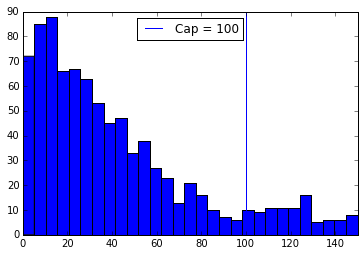

In [23]:
import matplotlib.pyplot as plt
import numpy as np

cap = 100

print "Num significant betas ", len(np.where(abs_thresh_matr > 0)[0])
print "Num below ", cap, ": ", len(np.where(np.logical_and(abs_thresh_matr < cap, abs_thresh_matr > 0))[0])

%matplotlib inline
plt.figure()
plt.xlim(0, 1.5*cap)
bins = np.linspace(0, 1.5*cap, 30)
plt.hist(abs_thresh_matr[np.where(abs_thresh_matr > 0)], bins=bins)
plt.axvline(x=cap, label="Cap = " + str(cap))
plt.legend(loc='best')
plt.show()

In [24]:
print "Capping matrix at ", cap
abs_thresh_matr[np.where(abs_thresh_matr > cap)] = 0
print "Num sig betas ", len(np.where(abs_thresh_matr > 0)[0])

Capping matrix at  100
Num sig betas  785


In [25]:
print "absitive Thresholded matrix file saved to ", abs_thresh_file

gtm.save_gene_matrix(filename=abs_thresh_file, matrix=abs_thresh_matr, genes=genes)

with open(abs_readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(abs_thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(abs_thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nCap threshold: "+ str(cap))

print "Readme file written to ", abs_readme_file

absitive Thresholded matrix file saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-1_beta-t-1_unshuffled-abs-thresh-FDR-0.1.txt
Readme file written to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-1_beta-t-1__abs-README.txt


## Right thresh

In [26]:
# Threshold by taking, for each causal gene j, the set of betas that are higher for that j, but lower for others
pos_beta_threshes = []
pos_thresh_matr = beta_matr.copy()

for j in range(beta_matr.shape[0]):
    beta_vec = beta_matr[j, :]
    rand_beta_vec = rand_beta_matr[j, :]
    
    pos_beta_thresh = FDR_above_threshold(beta_vec, rand_beta_vec, fdr)
    
    pos_beta_threshes.append(pos_beta_thresh)
    
    if pos_beta_thresh == None:
        pos_thresh_matr[j, :] = np.zeros(pos_thresh_matr.shape[1])
    else:
        c = pos_thresh_matr[j, :]
        c[np.where(c < pos_beta_thresh)] = 0
        
        # print "Gene ", j, " Beta: ", pos_beta_thresh, " Num sig:", len(np.where(c)[0])
import os
os.system("say 'finished'")

0

Num significant betas  2924
Num below  100 :  1828


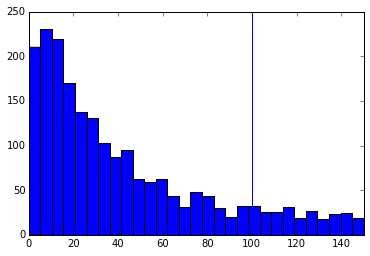

In [27]:
import matplotlib.pyplot as plt
import numpy as np

cap = 100

print "Num significant betas ", len(np.where(pos_thresh_matr > 0)[0])
print "Num below ", cap, ": ", len(np.where(np.logical_and(pos_thresh_matr < cap, pos_thresh_matr > 0))[0])

%matplotlib inline
plt.figure()
plt.xlim(0, 1.5*cap)
bins = np.linspace(0, 1.5*cap, 30)
plt.hist(pos_thresh_matr[np.where(pos_thresh_matr > 0)], bins=bins)
plt.axvline(x=cap, label="Cap = " + str(cap))
plt.show()

In [28]:
print "Capping matrix at ", cap
pos_thresh_matr[np.where(pos_thresh_matr > cap)] = 0
print "Num sig betas ", len(np.where(pos_thresh_matr > 0)[0])

Capping matrix at  100
Num sig betas  1828


In [29]:
print "Positive Thresholded matrix file saved to ", pos_thresh_file

gtm.save_gene_matrix(filename=pos_thresh_file, matrix=pos_thresh_matr, genes=genes)

with open(pos_readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(pos_thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(pos_thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nCap threshold: "+ str(cap))

print "Readme file written to ", pos_readme_file

Positive Thresholded matrix file saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-1_beta-t-1_unshuffled-pos-thresh-FDR-0.1.txt
Readme file written to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-1_beta-t-1__pos-README.txt


## Left thresh

In [30]:
# Threshold by taking, for each causal gene j, the set of betas that are higher for that j, but lower for others
neg_beta_threshes = []
neg_thresh_matr = beta_matr.copy()

for j in range(neg_thresh_matr.shape[0]):
    beta_vec = beta_matr[j, :]
    rand_beta_vec = rand_beta_matr[j, :]
    
    neg_beta_thresh = FDR_below_threshold(beta_vec, rand_beta_vec, fdr)
    
    neg_beta_threshes.append(neg_beta_thresh)
    
    if neg_beta_thresh == None:
        neg_thresh_matr[j, :] = np.zeros(neg_thresh_matr.shape[1])
    else:
        c = neg_thresh_matr[j, :]
        c[np.where(c > neg_beta_thresh)] = 0
        
        # print "Gene ", j, " Beta: ", neg_beta_thresh, " Num sig:", len(np.where(c)[0])
import os
os.system("say 'finished'")

0

Num significant betas  9237
Num above  -100 :  7456


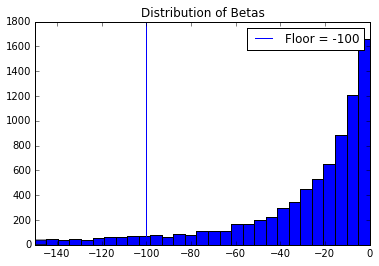

In [31]:
import matplotlib.pyplot as plt
import numpy as np

floor = -100

print "Num significant betas ", len(np.where(neg_thresh_matr < 0)[0])
print "Num above ", floor, ": ", len(np.where(np.logical_and(neg_thresh_matr > floor, neg_thresh_matr < 0))[0])

%matplotlib inline
plt.figure()
plt.xlim(1.5 * floor, 0)
bins = np.linspace(1.5 * floor, 0, 30)
plt.hist(neg_thresh_matr[np.where(neg_thresh_matr <0)], bins=bins)
plt.axvline(x=floor, label="Floor = "+str(floor))
plt.title("Distribution of Betas")
plt.legend(loc="best")
plt.show()

In [32]:
print "Thresholding matrix at ", floor
neg_thresh_matr[np.where(neg_thresh_matr < floor)] = 0
print "Num sig betas ", len(np.where(neg_thresh_matr < 0)[0])

Thresholding matrix at  -100
Num sig betas  7456


In [33]:
print "Thresholded matrix file saved to ", neg_thresh_file

gtm.save_gene_matrix(filename=neg_thresh_file, matrix=neg_thresh_matr, genes=genes)

with open(neg_readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(neg_thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(neg_thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nFloor: "+ str(floor))

print "Readme file written to ", neg_readme_file

Thresholded matrix file saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-1_beta-t-1_unshuffled-neg-thresh-FDR-0.1.txt
Readme file written to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-1_beta-t-1__neg-README.txt


In [34]:
thresh_matr = pos_thresh_matr + neg_thresh_matr

gtm.save_gene_matrix(filename=thresh_file, matrix=thresh_matr, genes=genes)

print "Total sig pairs: ", len(np.where(thresh_matr != 0)[0])
with open(readme_file, 'w') as f:
    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nCap: " + str(cap))
    f.write("\nFloor: "+ str(floor))
    
print "Readme file written to ", readme_file


Total sig pairs:  9284
Readme file written to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-1_beta-t-1__README.txt


In [35]:
post_abs_thresh_matr =  np.absolute(thresh_matr)

gtm.save_gene_matrix(filename=post_abs_thresh_file, matrix=post_abs_thresh_matr, genes=genes)

print "Total sig pairs: ", len(np.where(post_abs_thresh_matr != 0)[0])
with open(readme_file, 'w') as f:
    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(post_abs_thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(post_abs_thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nCap: " + str(cap))
    f.write("\nFloor: "+ str(floor))
    
print "Readme file written to ", post_abs_readme_file


Total sig pairs:  9284
Readme file written to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-1_beta-t-1__post-abs-README.txt


# Lag 2, t-2

In [36]:
import matplotlib.pyplot as plt

fdr = 0.1
lag = 2
t = 2
index = lag - 1
num = t - 1

prefix = folder + "Lag-" + str(index + 1) + "_beta-t-" + str(num + 1) + "_"
pos_thresh_file = prefix + "unshuffled-pos-thresh-FDR-" + str(fdr) + ".txt"
neg_thresh_file = prefix + "unshuffled-neg-thresh-FDR-" + str(fdr) + ".txt"
thresh_file = prefix + "unshuffled-thresh-FDR-" + str(fdr) + ".txt"
abs_thresh_file = prefix + "unshuffled-abs-thresh-FDR-" + str(fdr) + ".txt"
post_abs_thresh_file = prefix + "unshuffled-post-abs-thresh-FDR-" + str(fdr) + ".txt"


matrix_file = prefix + "unshuffled-no-thresh.txt"
rand_matrix_file = prefix + "shuffled.txt"
pos_readme_file = prefix + "_pos-README.txt"
neg_readme_file = prefix + "_neg-README.txt"
readme_file = prefix + "_README.txt"
abs_readme_file = prefix + "_abs-README.txt"
post_abs_readme_file = prefix + "_post-abs-README.txt"

beta_matr = betas[index][:, :, num]
rand_beta_matr = rand_betas[index][:, :, num]
sig_matr = sigs[index]

genes = data["gene"]
rand_genes = rand_data["gene"]


print "Beta Matrix of lag ", index + 1, "and num", num + 1, "saved to ", matrix_file
gtm.save_gene_matrix(matrix=beta_matr, filename=matrix_file, genes=genes)

print "Rand Matrix of lag", index + 1, "and num", num + 1, " saved to ", rand_matrix_file
gtm.save_gene_matrix(matrix=rand_beta_matr, filename=rand_matrix_file, genes=rand_genes)

print "Using original"
print "Trying to have an FDR of ", fdr
print "Taking the ", num + 1, "-th previous timepoint"




import os
os.system("say 'finished'")

Beta Matrix of lag  2 and num 2 saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-2_beta-t-2_unshuffled-no-thresh.txt
Rand Matrix of lag 2 and num 2  saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-2_beta-t-2_shuffled.txt
Using original
Trying to have an FDR of  0.1
Taking the  2 -th previous timepoint


0

In [37]:
# Threshold by taking, for each causal gene j, the set of betas that are higher for that j, but lower for others
abs_beta_threshes = []
abs_thresh_matr = beta_matr.copy()

for j in range(beta_matr.shape[0]):
    beta_vec = np.absolute(beta_matr[j, :])
    rand_beta_vec = np.absolute(rand_beta_matr[j, :])
    
    abs_beta_thresh = FDR_above_threshold(beta_vec, rand_beta_vec, fdr)
    
    abs_beta_threshes.append(abs_beta_thresh)
    
    if abs_beta_thresh == None:
        abs_thresh_matr[j, :] = np.zeros(abs_thresh_matr.shape[1])
    else:
        c = abs_thresh_matr[j, :]
        c[np.where(c < abs_beta_thresh)] = 0
        
        # print "Gene ", j, " Beta: ", abs_beta_thresh, " Num sig:", len(np.where(c)[0])
import os
os.system("say 'finished'")

0

Num significant betas  1064
Num below  100 :  622


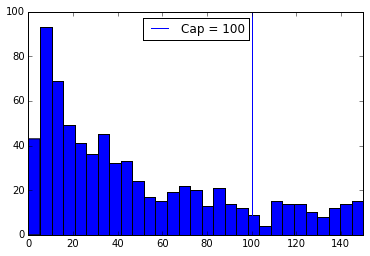

In [38]:
import matplotlib.pyplot as plt
import numpy as np

cap = 100

print "Num significant betas ", len(np.where(abs_thresh_matr > 0)[0])
print "Num below ", cap, ": ", len(np.where(np.logical_and(abs_thresh_matr < cap, abs_thresh_matr > 0))[0])

%matplotlib inline
plt.figure()
plt.xlim(0, 1.5*cap)
bins = np.linspace(0, 1.5*cap, 30)
plt.hist(abs_thresh_matr[np.where(abs_thresh_matr > 0)], bins=bins)
plt.axvline(x=cap, label="Cap = " + str(cap))
plt.legend(loc='best')
plt.show()

In [39]:
print "Capping matrix at ", cap
abs_thresh_matr[np.where(abs_thresh_matr > cap)] = 0
print "Num sig betas ", len(np.where(abs_thresh_matr > 0)[0])

Capping matrix at  100
Num sig betas  622


In [40]:
print "absitive Thresholded matrix file saved to ", abs_thresh_file

gtm.save_gene_matrix(filename=abs_thresh_file, matrix=abs_thresh_matr, genes=genes)

with open(abs_readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(abs_thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(abs_thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nCap threshold: "+ str(cap))

print "Readme file written to ", abs_readme_file

absitive Thresholded matrix file saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-2_beta-t-2_unshuffled-abs-thresh-FDR-0.1.txt
Readme file written to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-2_beta-t-2__abs-README.txt


## Right thresh

In [41]:
# Threshold by taking, for each causal gene j, the set of betas that are higher for that j, but lower for others
pos_beta_threshes = []
pos_thresh_matr = beta_matr.copy()

for j in range(beta_matr.shape[0]):
    beta_vec = beta_matr[j, :]
    rand_beta_vec = rand_beta_matr[j, :]
    
    pos_beta_thresh = FDR_above_threshold(beta_vec, rand_beta_vec, fdr)
    
    pos_beta_threshes.append(pos_beta_thresh)
    
    if pos_beta_thresh == None:
        pos_thresh_matr[j, :] = np.zeros(pos_thresh_matr.shape[1])
    else:
        c = pos_thresh_matr[j, :]
        c[np.where(c < pos_beta_thresh)] = 0
        
        # print "Gene ", j, " Beta: ", pos_beta_thresh, " Num sig:", len(np.where(c)[0])
import os
os.system("say 'finished'")

0

Num significant betas  3593
Num below  100 :  2540


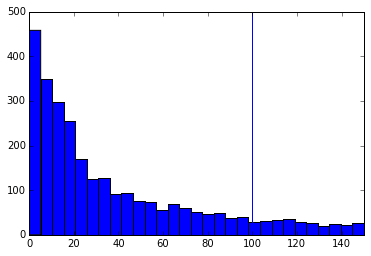

In [42]:
import matplotlib.pyplot as plt
import numpy as np

cap = 100

print "Num significant betas ", len(np.where(pos_thresh_matr > 0)[0])
print "Num below ", cap, ": ", len(np.where(np.logical_and(pos_thresh_matr < cap, pos_thresh_matr > 0))[0])

%matplotlib inline
plt.figure()
plt.xlim(0, 1.5*cap)
bins = np.linspace(0, 1.5*cap, 30)
plt.hist(pos_thresh_matr[np.where(pos_thresh_matr > 0)], bins=bins)
plt.axvline(x=cap, label="Cap = " + str(cap))
plt.show()

In [43]:
print "Capping matrix at ", cap
pos_thresh_matr[np.where(pos_thresh_matr > cap)] = 0
print "Num sig betas ", len(np.where(pos_thresh_matr > 0)[0])

Capping matrix at  100
Num sig betas  2540


In [44]:
print "Positive Thresholded matrix file saved to ", pos_thresh_file

gtm.save_gene_matrix(filename=pos_thresh_file, matrix=pos_thresh_matr, genes=genes)

with open(pos_readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(pos_thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(pos_thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nCap threshold: "+ str(cap))

print "Readme file written to ", pos_readme_file

Positive Thresholded matrix file saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-2_beta-t-2_unshuffled-pos-thresh-FDR-0.1.txt
Readme file written to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-2_beta-t-2__pos-README.txt


## Left thresh

In [45]:
# Threshold by taking, for each causal gene j, the set of betas that are higher for that j, but lower for others
neg_beta_threshes = []
neg_thresh_matr = beta_matr.copy()

for j in range(neg_thresh_matr.shape[0]):
    beta_vec = beta_matr[j, :]
    rand_beta_vec = rand_beta_matr[j, :]
    
    neg_beta_thresh = FDR_below_threshold(beta_vec, rand_beta_vec, fdr)
    
    neg_beta_threshes.append(neg_beta_thresh)
    
    if neg_beta_thresh == None:
        neg_thresh_matr[j, :] = np.zeros(neg_thresh_matr.shape[1])
    else:
        c = neg_thresh_matr[j, :]
        c[np.where(c > neg_beta_thresh)] = 0
        
        # print "Gene ", j, " Beta: ", neg_beta_thresh, " Num sig:", len(np.where(c)[0])
import os
os.system("say 'finished'")

0

Num significant betas  2706
Num above  -100 :  2077


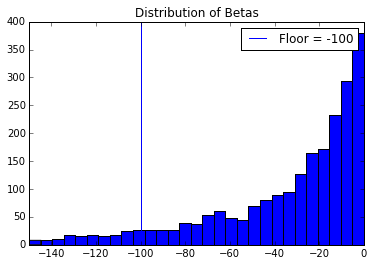

In [46]:
import matplotlib.pyplot as plt
import numpy as np

floor = -100

print "Num significant betas ", len(np.where(neg_thresh_matr < 0)[0])
print "Num above ", floor, ": ", len(np.where(np.logical_and(neg_thresh_matr > floor, neg_thresh_matr < 0))[0])

%matplotlib inline
plt.figure()
plt.xlim(1.5 * floor, 0)
bins = np.linspace(1.5 * floor, 0, 30)
plt.hist(neg_thresh_matr[np.where(neg_thresh_matr <0)], bins=bins)
plt.axvline(x=floor, label="Floor = "+str(floor))
plt.title("Distribution of Betas")
plt.legend(loc="best")
plt.show()

In [47]:
print "Thresholding matrix at ", floor
neg_thresh_matr[np.where(neg_thresh_matr < floor)] = 0
print "Num sig betas ", len(np.where(neg_thresh_matr < 0)[0])

Thresholding matrix at  -100
Num sig betas  2077


In [48]:
print "Thresholded matrix file saved to ", neg_thresh_file

gtm.save_gene_matrix(filename=neg_thresh_file, matrix=neg_thresh_matr, genes=genes)

with open(neg_readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(neg_thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(neg_thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nFloor: "+ str(floor))

print "Readme file written to ", neg_readme_file

Thresholded matrix file saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-2_beta-t-2_unshuffled-neg-thresh-FDR-0.1.txt
Readme file written to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-2_beta-t-2__neg-README.txt


In [49]:
thresh_matr = pos_thresh_matr + neg_thresh_matr

gtm.save_gene_matrix(filename=thresh_file, matrix=thresh_matr, genes=genes)


print "Total sig pairs: ", len(np.where(thresh_matr != 0)[0])
with open(readme_file, 'w') as f:
    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nCap: " + str(cap))
    f.write("\nFloor: "+ str(floor))
    
print "Readme file written to ", readme_file


Total sig pairs:  4617
Readme file written to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-2_beta-t-2__README.txt


In [50]:
post_abs_thresh_matr =  np.absolute(thresh_matr)

gtm.save_gene_matrix(filename=post_abs_thresh_file, matrix=post_abs_thresh_matr, genes=genes)

print "Total sig pairs: ", len(np.where(post_abs_thresh_matr != 0)[0])
with open(readme_file, 'w') as f:
    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(post_abs_thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(post_abs_thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nCap: " + str(cap))
    f.write("\nFloor: "+ str(floor))
    
print "Readme file written to ", post_abs_readme_file

Total sig pairs:  4617
Readme file written to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-2_beta-t-2__post-abs-README.txt


# Lag 3, t-3

In [51]:
import matplotlib.pyplot as plt

fdr = 0.1
lag = 3
t = 3
index = lag - 1
num = t - 1

prefix = folder + "Lag-" + str(index + 1) + "_beta-t-" + str(num + 1) + "_"
pos_thresh_file = prefix + "unshuffled-pos-thresh-FDR-" + str(fdr) + ".txt"
neg_thresh_file = prefix + "unshuffled-neg-thresh-FDR-" + str(fdr) + ".txt"
thresh_file = prefix + "unshuffled-thresh-FDR-" + str(fdr) + ".txt"
abs_thresh_file = prefix + "unshuffled-abs-thresh-FDR-" + str(fdr) + ".txt"
post_abs_thresh_file = prefix + "unshuffled-post-abs-thresh-FDR-" + str(fdr) + ".txt"


matrix_file = prefix + "unshuffled-no-thresh.txt"
rand_matrix_file = prefix + "shuffled.txt"
pos_readme_file = prefix + "_pos-README.txt"
neg_readme_file = prefix + "_neg-README.txt"
readme_file = prefix + "_README.txt"
abs_readme_file = prefix + "_abs-README.txt"
post_abs_readme_file = prefix + "_post-abs-README.txt"

beta_matr = betas[index][:, :, num]
rand_beta_matr = rand_betas[index][:, :, num]
sig_matr = sigs[index]

genes = data["gene"]
rand_genes = rand_data["gene"]


print "Beta Matrix of lag ", index + 1, "and num", num + 1, "saved to ", matrix_file
gtm.save_gene_matrix(matrix=beta_matr, filename=matrix_file, genes=genes)

print "Rand Matrix of lag", index + 1, "and num", num + 1, " saved to ", rand_matrix_file
gtm.save_gene_matrix(matrix=rand_beta_matr, filename=rand_matrix_file, genes=rand_genes)

print "Using original"
print "Trying to have an FDR of ", fdr
print "Taking the ", num + 1, "-th previous timepoint"




import os
os.system("say 'finished'")

Beta Matrix of lag  3 and num 3 saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-3_beta-t-3_unshuffled-no-thresh.txt
Rand Matrix of lag 3 and num 3  saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-3_beta-t-3_shuffled.txt
Using original
Trying to have an FDR of  0.1
Taking the  3 -th previous timepoint


0

In [52]:
# Threshold by taking, for each causal gene j, the set of betas that are higher for that j, but lower for others
abs_beta_threshes = []
abs_thresh_matr = beta_matr.copy()

for j in range(beta_matr.shape[0]):
    beta_vec = np.absolute(beta_matr[j, :])
    rand_beta_vec = np.absolute(rand_beta_matr[j, :])
    
    abs_beta_thresh = FDR_above_threshold(beta_vec, rand_beta_vec, fdr)
    
    abs_beta_threshes.append(abs_beta_thresh)
    
    if abs_beta_thresh == None:
        abs_thresh_matr[j, :] = np.zeros(abs_thresh_matr.shape[1])
    else:
        c = abs_thresh_matr[j, :]
        c[np.where(c < abs_beta_thresh)] = 0
        
        # print "Gene ", j, " Beta: ", abs_beta_thresh, " Num sig:", len(np.where(c)[0])
import os
os.system("say 'finished'")

0

Num significant betas  1394
Num below  100 :  776


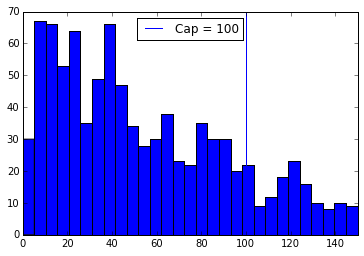

In [53]:
import matplotlib.pyplot as plt
import numpy as np

cap = 100

print "Num significant betas ", len(np.where(abs_thresh_matr > 0)[0])
print "Num below ", cap, ": ", len(np.where(np.logical_and(abs_thresh_matr < cap, abs_thresh_matr > 0))[0])

%matplotlib inline
plt.figure()
plt.xlim(0, 1.5*cap)
bins = np.linspace(0, 1.5*cap, 30)
plt.hist(abs_thresh_matr[np.where(abs_thresh_matr > 0)], bins=bins)
plt.axvline(x=cap, label="Cap = " + str(cap))
plt.legend(loc='best')
plt.show()

In [54]:
print "Capping matrix at ", cap
abs_thresh_matr[np.where(abs_thresh_matr > cap)] = 0
print "Num sig betas ", len(np.where(abs_thresh_matr > 0)[0])

Capping matrix at  100
Num sig betas  776


In [55]:
print "absitive Thresholded matrix file saved to ", abs_thresh_file

gtm.save_gene_matrix(filename=abs_thresh_file, matrix=abs_thresh_matr, genes=genes)

with open(abs_readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(abs_thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(abs_thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nCap threshold: "+ str(cap))

print "Readme file written to ", abs_readme_file

absitive Thresholded matrix file saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-3_beta-t-3_unshuffled-abs-thresh-FDR-0.1.txt
Readme file written to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-3_beta-t-3__abs-README.txt


## Right thresh

In [56]:
# Threshold by taking, for each causal gene j, the set of betas that are higher for that j, but lower for others
pos_beta_threshes = []
pos_thresh_matr = beta_matr.copy()

for j in range(beta_matr.shape[0]):
    beta_vec = beta_matr[j, :]
    rand_beta_vec = rand_beta_matr[j, :]
    
    pos_beta_thresh = FDR_above_threshold(beta_vec, rand_beta_vec, fdr)
    
    pos_beta_threshes.append(pos_beta_thresh)
    
    if pos_beta_thresh == None:
        pos_thresh_matr[j, :] = np.zeros(pos_thresh_matr.shape[1])
    else:
        c = pos_thresh_matr[j, :]
        c[np.where(c < pos_beta_thresh)] = 0
        
        # print "Gene ", j, " Beta: ", pos_beta_thresh, " Num sig:", len(np.where(c)[0])
import os
os.system("say 'finished'")

0

Num significant betas  4231
Num below  100 :  2753


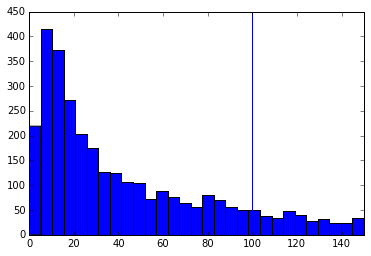

In [57]:
import matplotlib.pyplot as plt
import numpy as np

cap = 100

print "Num significant betas ", len(np.where(pos_thresh_matr > 0)[0])
print "Num below ", cap, ": ", len(np.where(np.logical_and(pos_thresh_matr < cap, pos_thresh_matr > 0))[0])

%matplotlib inline
plt.figure()
plt.xlim(0, 1.5*cap)
bins = np.linspace(0, 1.5*cap, 30)
plt.hist(pos_thresh_matr[np.where(pos_thresh_matr > 0)], bins=bins)
plt.axvline(x=cap, label="Cap = " + str(cap))
plt.show()

In [58]:
print "Capping matrix at ", cap
pos_thresh_matr[np.where(pos_thresh_matr > cap)] = 0
print "Num sig betas ", len(np.where(pos_thresh_matr > 0)[0])

Capping matrix at  100
Num sig betas  2753


In [59]:
print "Positive Thresholded matrix file saved to ", pos_thresh_file

gtm.save_gene_matrix(filename=pos_thresh_file, matrix=pos_thresh_matr, genes=genes)

with open(pos_readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(pos_thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(pos_thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nCap threshold: "+ str(cap))

print "Readme file written to ", pos_readme_file

Positive Thresholded matrix file saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-3_beta-t-3_unshuffled-pos-thresh-FDR-0.1.txt
Readme file written to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-3_beta-t-3__pos-README.txt


## Left thresh

In [60]:
# Threshold by taking, for each causal gene j, the set of betas that are higher for that j, but lower for others
neg_beta_threshes = []
neg_thresh_matr = beta_matr.copy()

for j in range(neg_thresh_matr.shape[0]):
    beta_vec = beta_matr[j, :]
    rand_beta_vec = rand_beta_matr[j, :]
    
    neg_beta_thresh = FDR_below_threshold(beta_vec, rand_beta_vec, fdr)
    
    neg_beta_threshes.append(neg_beta_thresh)
    
    if neg_beta_thresh == None:
        neg_thresh_matr[j, :] = np.zeros(neg_thresh_matr.shape[1])
    else:
        c = neg_thresh_matr[j, :]
        c[np.where(c > neg_beta_thresh)] = 0
        
        # print "Gene ", j, " Beta: ", neg_beta_thresh, " Num sig:", len(np.where(c)[0])
import os
os.system("say 'finished'")

0

Num significant betas  2121
Num above  -100 :  1378


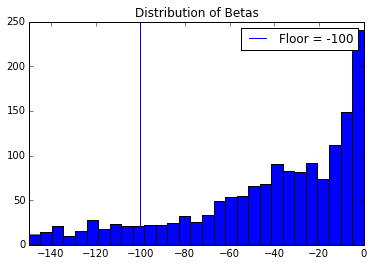

In [61]:
import matplotlib.pyplot as plt
import numpy as np

floor = -100

print "Num significant betas ", len(np.where(neg_thresh_matr < 0)[0])
print "Num above ", floor, ": ", len(np.where(np.logical_and(neg_thresh_matr > floor, neg_thresh_matr < 0))[0])

%matplotlib inline
plt.figure()
plt.xlim(1.5 * floor, 0)
bins = np.linspace(1.5 * floor, 0, 30)
plt.hist(neg_thresh_matr[np.where(neg_thresh_matr <0)], bins=bins)
plt.axvline(x=floor, label="Floor = "+str(floor))
plt.title("Distribution of Betas")
plt.legend(loc="best")
plt.show()

In [62]:
print "Thresholding matrix at ", floor
neg_thresh_matr[np.where(neg_thresh_matr < floor)] = 0
print "Num sig betas ", len(np.where(neg_thresh_matr < 0)[0])

Thresholding matrix at  -100
Num sig betas  1378


In [63]:
print "Thresholded matrix file saved to ", neg_thresh_file

gtm.save_gene_matrix(filename=neg_thresh_file, matrix=neg_thresh_matr, genes=genes)

with open(neg_readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(neg_thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(neg_thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nFloor: "+ str(floor))

print "Readme file written to ", neg_readme_file

Thresholded matrix file saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-3_beta-t-3_unshuffled-neg-thresh-FDR-0.1.txt
Readme file written to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-3_beta-t-3__neg-README.txt


In [64]:
thresh_matr = pos_thresh_matr + neg_thresh_matr

gtm.save_gene_matrix(filename=thresh_file, matrix=thresh_matr, genes=genes)


print "Total sig pairs: ", len(np.where(thresh_matr != 0)[0])
with open(readme_file, 'w') as f:
    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nCap: " + str(cap))
    f.write("\nFloor: "+ str(floor))
    
print "Readme file written to ", readme_file


Total sig pairs:  4131
Readme file written to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-3_beta-t-3__README.txt


In [65]:
post_abs_thresh_matr =  np.absolute(thresh_matr)

gtm.save_gene_matrix(filename=post_abs_thresh_file, matrix=post_abs_thresh_matr, genes=genes)

print "Total sig pairs: ", len(np.where(post_abs_thresh_matr != 0)[0])
with open(readme_file, 'w') as f:
    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(post_abs_thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(post_abs_thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nCap: " + str(cap))
    f.write("\nFloor: "+ str(floor))
    
print "Readme file written to ", post_abs_readme_file


Total sig pairs:  4131
Readme file written to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-3_beta-t-3__post-abs-README.txt


In [66]:
import os
os.system("say 'ALL DONE'")

0

# Copy-pastable

In [36]:
import matplotlib.pyplot as plt

fdr = 0.1
lag = 2
t = 2
index = lag - 1
num = t - 1

prefix = folder + "Lag-" + str(index + 1) + "_beta-t-" + str(num + 1) + "_"
pos_thresh_file = prefix + "unshuffled-pos-thresh-FDR-" + str(fdr) + ".txt"
neg_thresh_file = prefix + "unshuffled-neg-thresh-FDR-" + str(fdr) + ".txt"
thresh_file = prefix + "unshuffled-thresh-FDR-" + str(fdr) + ".txt"
abs_thresh_file = prefix + "unshuffled-abs-thresh-FDR-" + str(fdr) + ".txt"
post_abs_thresh_file = prefix + "unshuffled-post-abs-thresh-FDR-" + str(fdr) + ".txt"


matrix_file = prefix + "unshuffled-no-thresh.txt"
rand_matrix_file = prefix + "shuffled.txt"
pos_readme_file = prefix + "_pos-README.txt"
neg_readme_file = prefix + "_neg-README.txt"
readme_file = prefix + "_README.txt"
abs_readme_file = prefix + "_abs-README.txt"
post_abs_readme_file = prefix + "_post-abs-README.txt"

beta_matr = betas[index][:, :, num]
rand_beta_matr = rand_betas[index][:, :, num]
sig_matr = sigs[index]

genes = data["gene"]
rand_genes = rand_data["gene"]


print "Beta Matrix of lag ", index + 1, "and num", num + 1, "saved to ", matrix_file
gtm.save_gene_matrix(matrix=beta_matr, filename=matrix_file, genes=genes)

print "Rand Matrix of lag", index + 1, "and num", num + 1, " saved to ", rand_matrix_file
gtm.save_gene_matrix(matrix=rand_beta_matr, filename=rand_matrix_file, genes=rand_genes)

print "Using original"
print "Trying to have an FDR of ", fdr
print "Taking the ", num + 1, "-th previous timepoint"




import os
os.system("say 'finished'")

# Threshold by taking, for each causal gene j, the set of betas that are higher for that j, but lower for others
abs_beta_threshes = []
abs_thresh_matr = beta_matr.copy()

for j in range(beta_matr.shape[0]):
    beta_vec = np.absolute(beta_matr[j, :])
    rand_beta_vec = np.absolute(rand_beta_matr[j, :])
    
    abs_beta_thresh = FDR_above_threshold(beta_vec, rand_beta_vec, fdr)
    
    abs_beta_threshes.append(abs_beta_thresh)
    
    if abs_beta_thresh == None:
        abs_thresh_matr[j, :] = np.zeros(abs_thresh_matr.shape[1])
    else:
        c = abs_thresh_matr[j, :]
        c[np.where(c < abs_beta_thresh)] = 0
        
        # print "Gene ", j, " Beta: ", abs_beta_thresh, " Num sig:", len(np.where(c)[0])
import os
os.system("say 'finished'")

import matplotlib.pyplot as plt
import numpy as np

cap = 100

print "Num significant betas ", len(np.where(abs_thresh_matr > 0)[0])
print "Num below ", cap, ": ", len(np.where(np.logical_and(abs_thresh_matr < cap, abs_thresh_matr > 0))[0])

%matplotlib inline
plt.figure()
plt.xlim(0, 1.5*cap)
bins = np.linspace(0, 1.5*cap, 30)
plt.hist(abs_thresh_matr[np.where(abs_thresh_matr > 0)], bins=bins)
plt.axvline(x=cap, label="Cap = " + str(cap))
plt.legend(loc='best')
plt.show()

print "Capping matrix at ", cap
abs_thresh_matr[np.where(abs_thresh_matr > cap)] = 0
print "Num sig betas ", len(np.where(abs_thresh_matr > 0)[0])

print "absitive Thresholded matrix file saved to ", abs_thresh_file

gtm.save_gene_matrix(filename=abs_thresh_file, matrix=abs_thresh_matr, genes=genes)

with open(abs_readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(abs_thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(abs_thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nCap threshold: "+ str(cap))

print "Readme file written to ", abs_readme_file

## Right thresh

# Threshold by taking, for each causal gene j, the set of betas that are higher for that j, but lower for others
pos_beta_threshes = []
pos_thresh_matr = beta_matr.copy()

for j in range(beta_matr.shape[0]):
    beta_vec = beta_matr[j, :]
    rand_beta_vec = rand_beta_matr[j, :]
    
    pos_beta_thresh = FDR_above_threshold(beta_vec, rand_beta_vec, fdr)
    
    pos_beta_threshes.append(pos_beta_thresh)
    
    if pos_beta_thresh == None:
        pos_thresh_matr[j, :] = np.zeros(pos_thresh_matr.shape[1])
    else:
        c = pos_thresh_matr[j, :]
        c[np.where(c < pos_beta_thresh)] = 0
        
        # print "Gene ", j, " Beta: ", pos_beta_thresh, " Num sig:", len(np.where(c)[0])
import os
os.system("say 'finished'")

import matplotlib.pyplot as plt
import numpy as np

cap = 100

print "Num significant betas ", len(np.where(pos_thresh_matr > 0)[0])
print "Num below ", cap, ": ", len(np.where(np.logical_and(pos_thresh_matr < cap, pos_thresh_matr > 0))[0])

%matplotlib inline
plt.figure()
plt.xlim(0, 1.5*cap)
bins = np.linspace(0, 1.5*cap, 30)
plt.hist(pos_thresh_matr[np.where(pos_thresh_matr > 0)], bins=bins)
plt.axvline(x=cap, label="Cap = " + str(cap))
plt.show()

print "Capping matrix at ", cap
pos_thresh_matr[np.where(pos_thresh_matr > cap)] = 0
print "Num sig betas ", len(np.where(pos_thresh_matr > 0)[0])

print "Positive Thresholded matrix file saved to ", pos_thresh_file

gtm.save_gene_matrix(filename=pos_thresh_file, matrix=pos_thresh_matr, genes=genes)

with open(pos_readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(pos_thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(pos_thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nCap threshold: "+ str(cap))

print "Readme file written to ", pos_readme_file

## Left thresh

# Threshold by taking, for each causal gene j, the set of betas that are higher for that j, but lower for others
neg_beta_threshes = []
neg_thresh_matr = beta_matr.copy()

for j in range(neg_thresh_matr.shape[0]):
    beta_vec = beta_matr[j, :]
    rand_beta_vec = rand_beta_matr[j, :]
    
    neg_beta_thresh = FDR_below_threshold(beta_vec, rand_beta_vec, fdr)
    
    neg_beta_threshes.append(neg_beta_thresh)
    
    if neg_beta_thresh == None:
        neg_thresh_matr[j, :] = np.zeros(neg_thresh_matr.shape[1])
    else:
        c = neg_thresh_matr[j, :]
        c[np.where(c > neg_beta_thresh)] = 0
        
        # print "Gene ", j, " Beta: ", neg_beta_thresh, " Num sig:", len(np.where(c)[0])
import os
os.system("say 'finished'")

import matplotlib.pyplot as plt
import numpy as np

floor = -100

print "Num significant betas ", len(np.where(neg_thresh_matr < 0)[0])
print "Num above ", floor, ": ", len(np.where(np.logical_and(neg_thresh_matr > floor, neg_thresh_matr < 0))[0])

%matplotlib inline
plt.figure()
plt.xlim(1.5 * floor, 0)
bins = np.linspace(1.5 * floor, 0, 30)
plt.hist(neg_thresh_matr[np.where(neg_thresh_matr <0)], bins=bins)
plt.axvline(x=floor, label="Floor = "+str(floor))
plt.title("Distribution of Betas")
plt.legend(loc="best")
plt.show()

print "Thresholding matrix at ", floor
neg_thresh_matr[np.where(neg_thresh_matr < floor)] = 0
print "Num sig betas ", len(np.where(neg_thresh_matr < 0)[0])

print "Thresholded matrix file saved to ", neg_thresh_file

gtm.save_gene_matrix(filename=neg_thresh_file, matrix=neg_thresh_matr, genes=genes)

with open(neg_readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(neg_thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(neg_thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nFloor: "+ str(floor))

print "Readme file written to ", neg_readme_file

thresh_matr = pos_thresh_matr + neg_thresh_matr

gtm.save_gene_matrix(filename=thresh_file, matrix=thresh_matr, genes=genes)


print "Total sig pairs: ", len(np.where(thresh_matr != 0)[0])
with open(readme_file, 'w') as f:
    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nCap: " + str(cap))
    f.write("\nFloor: "+ str(floor))
    
print "Readme file written to ", readme_file


post_abs_thresh_matr =  np.absolute(thresh_matr)

gtm.save_gene_matrix(filename=post_abs_thresh_file, matrix=post_abs_thresh_matr, genes=genes)

print "Total sig pairs: ", len(np.where(post_abs_thresh_matr != 0)[0])
with open(readme_file, 'w') as f:
    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(post_abs_thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(post_abs_thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nCap: " + str(cap))
    f.write("\nFloor: "+ str(floor))
    
print "Readme file written to ", post_abs_readme_file

Beta Matrix of lag  2 and num 2 saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-2_beta-t-2_unshuffled-no-thresh.txt
Rand Matrix of lag 2 and num 2  saved to  ../data/GeneExpressionData/protein_coding-DESeq/Lag-2_beta-t-2_shuffled.txt
Using original
Trying to have an FDR of  0.1
Taking the  2 -th previous timepoint


0